In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [ ]:
ds = np.random.randint(0, 2**32)
sigma = 0.4
alpha = 0.025
dt = 0.05
outputpath = f'sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(9, 40)

In [5]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

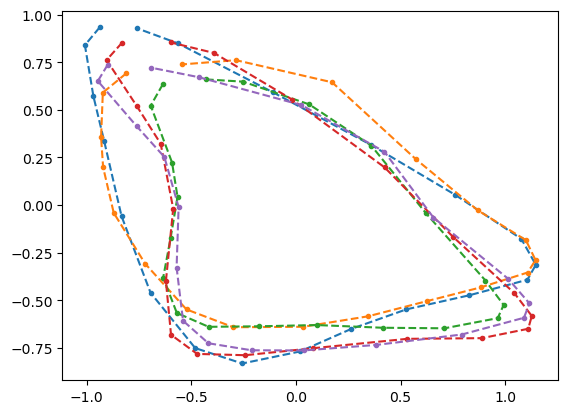

In [6]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [7]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -0.939029  0.932883 -1.009244  0.840017 -0.968496  0.571354   
theseus    -0.810856  0.692413 -0.923508  0.590471 -0.931845  0.355526   
hercules   -0.636104  0.635448 -0.694584  0.522359 -0.592558  0.223499   
amphitryon -0.831273  0.853144 -0.905507  0.761873 -0.761043  0.519866   
telemachus -0.900070  0.737274 -0.947384  0.651553 -0.762454  0.415148   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.916942  0.335319 -0.833952 -0.058622  ...  0.758842  0.055334   
theseus    -0.922094  0.198646 -0.871405 -0.040948  ...  0.869842 -0.027929   
hercules   -0.566354  0.043348 -0.599809 -0.175262  ...  0.622258 -0.043972   
amphitryon -0.646927  0.322344 -0.586975 -0.018845  ...  0.749940 -0.165942   
telemachus -0.629226  0.252517 -0.561135 -0.010733  ...  0.657269 -0.065729   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel